In [147]:
# install and import necessary libraries.
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [148]:
# Loading data into pandas dataframe
df_data = pd.read_csv("Tweets.csv")

In [149]:
df_data.shape

(14640, 15)

In [150]:
df_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760000,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,570301130888122000,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,570301083672813000,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,570301031407624000,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,570300817074462000,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [151]:
#The percentage of tweets that each airline accounts in this dataset
(df_data[['airline', 'text']].groupby('airline').count()/len(df_data)*100).sort_values(by='text', ascending=False)

,text
airline,
United,26.106557
US Airways,19.897541
American,18.845628
Southwest,16.530055
Delta,15.177596
Virgin America,3.442623


Text(0, 0.5, 'Mood')

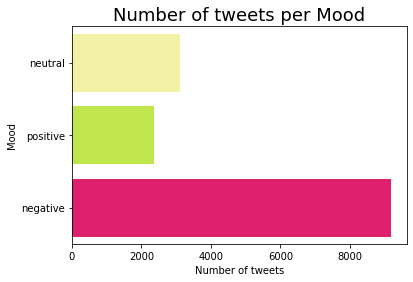

In [152]:
sns.countplot(y='airline_sentiment', data=df_data, palette=['#ffff99','#ccff33','#ff0066'])
plt.title('Number of tweets per Mood', fontsize=18)
plt.xlabel('Number of tweets')
plt.ylabel('Mood')

In [153]:
#Customer sentiment about each airline in tabular format
pd.crosstab(df_data.airline, df_data.airline_sentiment)

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


### Observation:
##### The dataset is slightly skewed towards the negetive sentiments. But neutral and positive sentiments combined constitute half the number of negetive sentiments. A balanced dataset is desirable but this should serve ok for our academic purposes.

In [154]:
# using columns airline_sentiment_confidence and text only for analysis purposes. These are the columns that has most relavance for the task at hand.
# also using set_option to avoid the text being truncated.
pd.set_option('display.max_colwidth', None)
df_data = df_data.loc[:,['airline_sentiment','text']]

In [155]:
# Checking for Null values
df_data.isnull().any()

airline_sentiment    False
text                 False
dtype: bool

In [156]:
print(f'Shape = {df_data.shape}')
df_data.head()

Shape = (14640, 2)


,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


### Text pre-processing: Data preparation

1) Html tag removal.

In [157]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df_data['text'] = df_data['text'].apply(lambda x: strip_html(x))
df_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


2) Remove the numbers.

In [158]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df_data['text'] = df_data['text'].apply(lambda x: remove_numbers(x))
df_data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


3) Removal of Special Characters and Punctuations.

In [159]:
def remove_specialchar_punct(text):
  text = re.sub(r'[^A-Za-z0-9 ]+', '', text)
  return text

df_data['text'] = df_data['text'].apply(lambda x: remove_specialchar_punct(x))
df_data.head()

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus youve added commercials to the experience tacky
2,neutral,VirginAmerica I didnt today Must mean I need to take another trip
3,negative,VirginAmerica its really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,VirginAmerica and its a really big bad thing about it


4) Conversion to lowercase.

In [160]:
def text_tolower(text):
   return text.lower()

df_data['text'] = df_data['text'].apply(lambda x: text_tolower(x))
df_data.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus youve added commercials to the experience tacky
2,neutral,virginamerica i didnt today must mean i need to take another trip
3,negative,virginamerica its really aggressive to blast obnoxious entertainment in your guests faces they have little recourse
4,negative,virginamerica and its a really big bad thing about it


5) Tokenize the text

In [161]:
df_data['text'] = df_data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [162]:
df_data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, youve, added, commercials, to, the, experience, tacky]"
2,neutral,"[virginamerica, i, didnt, today, must, mean, i, need, to, take, another, trip]"
3,negative,"[virginamerica, its, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]"
4,negative,"[virginamerica, and, its, a, really, big, bad, thing, about, it]"


In [163]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))   

6) Removal of non-ASCII words, Stop word removal, lemmatization, join the words and return in string format

In [164]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
      if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df_data['text'] = df_data.apply(lambda row: normalize(row['text']), axis=1)
df_data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus youve add commercials experience tacky
2,neutral,virginamerica didnt today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


### Vectorization

In [165]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=2000)
cvec_features = count_vectorizer.fit_transform(df_data['text'])

cvec_features = cvec_features.toarray()                        # Convert the data features to array.

In [166]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2000)
tfidf_features = tfidf_vectorizer.fit_transform(df_data['text'])

tfidf_features = tfidf_features.toarray()                        # Convert the data features to array.

In [167]:
print(cvec_features.shape)
print(tfidf_features.shape)

(14640, 2000)
(14640, 2000)


In [168]:
labels = df_data['airline_sentiment']

In [169]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(cvec_features, labels, test_size=0.3, random_state=42)

In [170]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_features, labels, test_size=0.3, random_state=42)

### Applying Random Forest

In [171]:
# Using Random Forest to build model for the Classification of the sentiment score using Count vectorizer data.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_cvec = RandomForestClassifier(n_estimators=100, n_jobs=4)

forest_cvec = forest_cvec.fit(X_train_count, y_train_count)

print(forest_cvec)

print(np.mean(cross_val_score(forest_cvec, cvec_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.730327868852459


In [172]:
# Using Random Forest to build model for the Classification of the sentiment score using tfidf vectorizer data.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest_tfidf = RandomForestClassifier(n_estimators=100, n_jobs=4)

forest_tfidf = forest_tfidf.fit(X_train_tfidf, y_train_tfidf)

print(forest_tfidf)

print(np.mean(cross_val_score(forest_tfidf, cvec_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7267076502732239


In [173]:
print(f'Random Forest train score on count vectorized data {forest_cvec.score(X_train_count, y_train_count)}')
print(f'Random Forest test score on count vectorized data {forest_cvec.score(X_test_count, y_test_count)}')

Random Forest train score on count vectorized data 0.9931693989071039
Random Forest test score on count vectorized data 0.7739071038251366


In [174]:
print(f'Random Forest train score on TF-IDF data {forest_tfidf.score(X_train_tfidf, y_train_tfidf)}')
print(f'Random Forest test score on TF-IDF data {forest_tfidf.score(X_test_tfidf, y_test_tfidf)}')

Random Forest train score on TF-IDF data 0.993071818891491
Random Forest test score on TF-IDF data 0.7691256830601093


#### Classification report and confusion metrics

### Model performance using RF with both Count and tf-idf vectorized data

1) Count Vectorized

In [175]:
from sklearn.metrics import classification_report, confusion_matrix

In [176]:
print(classification_report(forest_cvec.predict(X_test_count), y_test_count))

              precision    recall  f1-score   support

    negative       0.90      0.83      0.86      3063
     neutral       0.50      0.59      0.54       746
    positive       0.61      0.73      0.67       583

    accuracy                           0.77      4392
   macro avg       0.67      0.72      0.69      4392
weighted avg       0.79      0.77      0.78      4392



<Figure size 432x288 with 0 Axes>

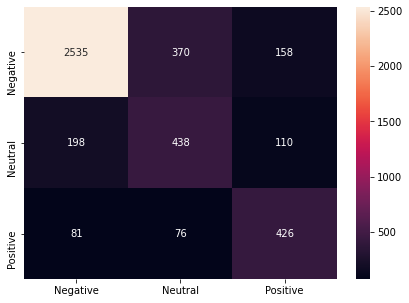

In [177]:
cm=confusion_matrix(forest_cvec.predict(X_test_count), y_test_count)
plt.figure()
df_cm = pd.DataFrame(cm, index = ['Negative', 'Neutral', 'Positive'], columns = ['Negative', 'Neutral', 'Positive'])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt='g');

2) TF-IDF Vectorized

In [178]:
print(classification_report(forest_tfidf.predict(X_test_tfidf), y_test_tfidf))

              precision    recall  f1-score   support

    negative       0.94      0.79      0.86      3329
     neutral       0.41      0.63      0.49       571
    positive       0.55      0.77      0.64       492

    accuracy                           0.77      4392
   macro avg       0.63      0.73      0.66      4392
weighted avg       0.82      0.77      0.79      4392



<Figure size 432x288 with 0 Axes>

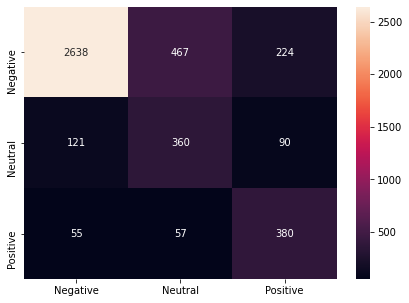

In [179]:
cm=confusion_matrix(forest_tfidf.predict(X_test_tfidf), y_test_tfidf)
plt.figure()
df_cm = pd.DataFrame(cm, index = ['Negative', 'Neutral', 'Positive'], columns = ['Negative', 'Neutral', 'Positive'])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g');

### Applying Naive Bayes

In [180]:
from sklearn.naive_bayes import MultinomialNB
clf_tfidf = MultinomialNB(alpha=0.83)
clf_tfidf.fit(X_train_tfidf, y_train_tfidf)
print(f'Naive Bayes train score on TF-IDF data {clf_tfidf.score(X_train_tfidf, y_train_tfidf)}')
print(f'Naive Bayes test score on TF-IDF data {clf_tfidf.score(X_test_tfidf, y_test_tfidf)}')

Naive Bayes train score on TF-IDF data 0.7785909445745511
Naive Bayes test score on TF-IDF data 0.7604735883424408


In [181]:
clf_count = MultinomialNB(alpha=0.83)
clf_count.fit(X_train_count, y_train_count)
print(f'Naive Bayes train score on count vectorized data {clf_count.score(X_train_count, y_train_count)}')
print(f'Naive Bayes test score on count vectorized data {clf_count.score(X_test_count, y_test_count)}')

Naive Bayes train score on count vectorized data 0.8175253708040593
Naive Bayes test score on count vectorized data 0.7775500910746812


In [182]:
print(classification_report(clf_tfidf.predict(X_test_tfidf), y_test_tfidf))

              precision    recall  f1-score   support

    negative       0.98      0.76      0.85      3637
     neutral       0.30      0.69      0.42       384
    positive       0.47      0.88      0.62       371

    accuracy                           0.76      4392
   macro avg       0.58      0.78      0.63      4392
weighted avg       0.87      0.76      0.79      4392



### Model performance using NB with both Count and tf-idf vectorized data

<Figure size 432x288 with 0 Axes>

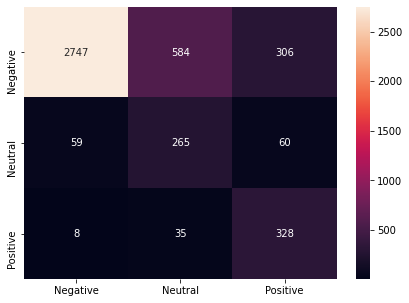

In [183]:
cm=confusion_matrix(clf_tfidf.predict(X_test_tfidf), y_test_tfidf)
plt.figure()
df_cm = pd.DataFrame(cm, index = ['Negative', 'Neutral', 'Positive'], columns = ['Negative', 'Neutral', 'Positive'])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt='g');

In [184]:
print(classification_report(clf_count.predict(X_test_count), y_test_count))

              precision    recall  f1-score   support

    negative       0.88      0.84      0.86      2943
     neutral       0.51      0.59      0.54       762
    positive       0.70      0.70      0.70       687

    accuracy                           0.78      4392
   macro avg       0.70      0.71      0.70      4392
weighted avg       0.79      0.78      0.78      4392



<Figure size 432x288 with 0 Axes>

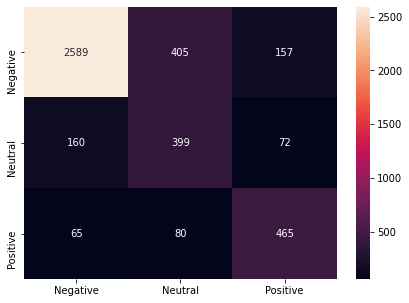

In [185]:
cm=confusion_matrix(clf_tfidf.predict(X_test_count), y_test_count)
plt.figure()
df_cm = pd.DataFrame(cm, index = ['Negative', 'Neutral', 'Positive'], columns = ['Negative', 'Neutral', 'Positive'])
plt.figure(figsize = (7,5));
sns.heatmap(df_cm, annot=True, fmt='g');

### Observations:
##### 1) Both Random Forest and Naive Bayes produce the same kind of accuracy scores. Random forest overfits on train data although.
##### 2) My observation is the count vectorizer performes better in this use case. But it is not a marked improvement.
##### 3) The data set is slightly skewed to the negetive side (More negetive tweets) hence the accuracy of the test data comes out to be slightly less. But the accuracy achieved is using Random forest and Naive Bayes is pretty good for a NLP model.